In [5]:
import os
import pandas as pd
import pylab as pl
import numpy as np
import wget
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import scipy.optimize as opt

import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import log_loss

from IPython.display import Image
# from sklearn.externals.six import StringIO

from sklearn.metrics import r2_score



---------------------- Data --------------------------
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


---------------------- Data histogram --------------------------


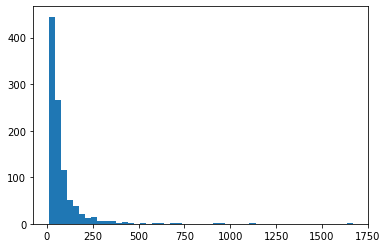



---------------------- Data Columns --------------------------
Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  
0       2  
1       6  
2       2  
3       1  
4       4  

 0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64


In [17]:
# K Nearest model

# data
# load from csv
tel_data = pd.read_csv('datasets/telecomm_data.csv')
print('\n\n---------------------- Data --------------------------')
print(tel_data.head())

tel_data['custcat'].value_counts()
# histogram
print('\n\n---------------------- Data histogram --------------------------')
plt.hist( x = tel_data['income'], bins= 50 )
plt.show()
print('\n\n---------------------- Data Columns --------------------------')
print(tel_data.columns)

X = tel_data.drop( 'custcat', axis = 1 ); print(X.head())
y = tel_data['custcat']; print('\n',y.head())



---------------------- Model Evaluation --------------------------
Train Set Accuracy:  0.5447761194029851
Test Set Accuracy:  0.3090909090909091

Classification Report:
                precision    recall  f1-score   support

           1       0.35      0.47      0.40        88
           2       0.29      0.33      0.31        64
           3       0.27      0.24      0.26        95
           4       0.30      0.20      0.24        83

    accuracy                           0.31       330
   macro avg       0.30      0.31      0.30       330
weighted avg       0.30      0.31      0.30       330


 Confusion Matrix:
 [[41  9 26 12]
 [15 21 14 14]
 [38 21 23 13]
 [23 22 21 17]]


---------------------- Model Evaluation --------------------------
Train set Accuracy:  0.5313432835820896
Test set Accuracy:  0.3151515151515151

Classification Report:
                precision    recall  f1-score   support

           1       0.34      0.47      0.39        88
           2       0.28   

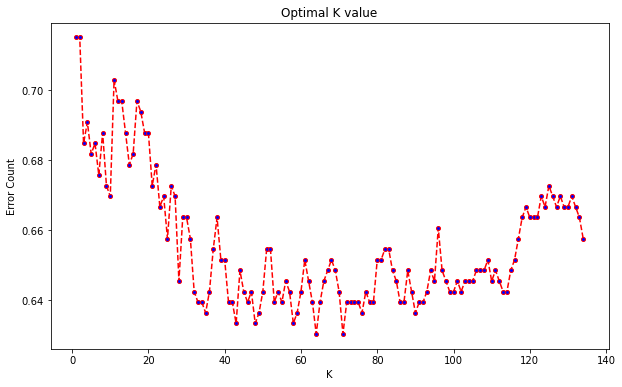

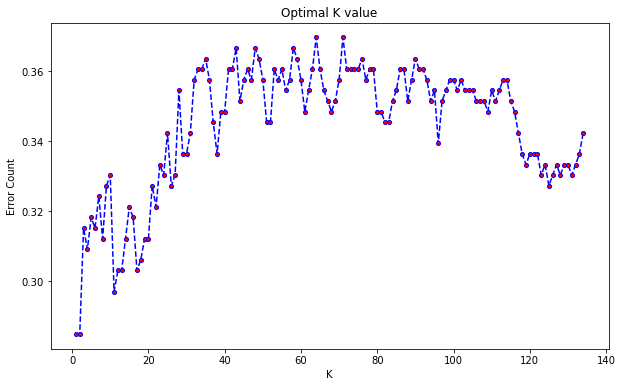



---------------------- Plot: Accuracy vs K  --------------------------


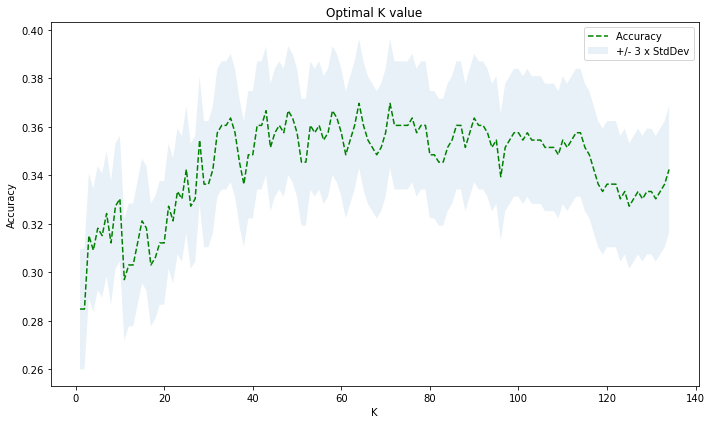

In [18]:
# Normalizing data
scaled_X = preprocessing.StandardScaler().fit(X).transform(X)

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
                                                     test_size= 0.33, random_state= 4)
from sklearn.neighbors import KNeighborsClassifier

Kn = 4

# Training the model
knn_model = KNeighborsClassifier(n_neighbors= Kn).fit(X_train, y_train)
knn_model

# prediction
y_hat = knn_model.predict(X_test)
y_hat[:20]

# model Eval
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print('\n\n---------------------- Model Evaluation --------------------------')
print( 'Train Set Accuracy: ', metrics.accuracy_score(y_train, knn_model.predict(X_train)) )
print( 'Test Set Accuracy: ', metrics.accuracy_score(y_test, y_hat) )

print('\nClassification Report:\n ', classification_report(y_test, y_hat) )
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_hat) )

# Building the model again with K = 6
Kn = 6
knn_model = KNeighborsClassifier(n_neighbors = Kn).fit(X_train,y_train)
y_hat = knn_model.predict(X_test)
print('\n\n---------------------- Model Evaluation --------------------------')
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

print('\nClassification Report:\n ', classification_report(y_test, y_hat) )
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_hat) )

# Finding Optimum value ok K
## calculating model error count for different Ks
Ks = 135
mean_error_count = []
Accuracy_Score = []
for each_Ki in range(1, Ks):
        _knn_model_ = KNeighborsClassifier(n_neighbors= each_Ki).fit(X_train,y_train)
        y_hat = _knn_model_.predict(X_test)
        
        # Error count
        mean_error_count.append( np.mean(y_hat!=y_test) )
        
        # Model accuracy
        Accuracy_Score.append( metrics.accuracy_score(y_test,y_hat) )
        
# min is found in K = 44

## plotting the error vs K 
print('\n\n---------------------- Plot - Error vs K --------------------------')
plt.figure(figsize=(10,6))
plt.plot(range(1,Ks), mean_error_count,
        color = 'red', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'blue', markersize = 4)
plt.title("Optimal K value"); plt.xlabel('K'); plt.ylabel('Error Count')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(1,Ks), Accuracy_Score,
        color = 'blue', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', markersize = 4)
plt.title("Optimal K value"); plt.xlabel('K'); plt.ylabel('Error Count')
plt.show()

# Calculating model accuracy

Ks = 135
mean_accuracy = np.zeros(Ks-1)
stdDev_accuracy = np.zeros(Ks-1)

for each_Ki in range(1,Ks):
    _knn_model_ = KNeighborsClassifier(n_neighbors= each_Ki).fit(X_train, y_train)
    y_hat = _knn_model_.predict(X_test)
    
    # Accuracy
    mean_accuracy[each_Ki-1] = metrics.accuracy_score(y_test,y_hat)
    
    # not imp - optional
    stdDev_accuracy[each_Ki-1] = np.std(y_hat==y_test) / np.sqrt(y_hat.shape[0])
    
## plotting the Accuracy vs K 
print('\n\n---------------------- Plot: Accuracy vs K  --------------------------')    
plt.figure(figsize=(10,6))
plt.plot( range(1,Ks), mean_accuracy,
          color = 'green', linestyle = 'dashed')

fill_Area1 = mean_accuracy - stdDev_accuracy
fill_Area2 = mean_accuracy + stdDev_accuracy

plt.fill_between( range(1,Ks),
                fill_Area1, fill_Area2,
                alpha = 0.1)

plt.title("Optimal K value"); plt.xlabel('K'); plt.ylabel('Accuracy')
plt.legend(('Accuracy ' , '+/- 3 x StdDev'))

plt.tight_layout()
plt.show()



---------------------- Plot: Accuracy vs K  --------------------------


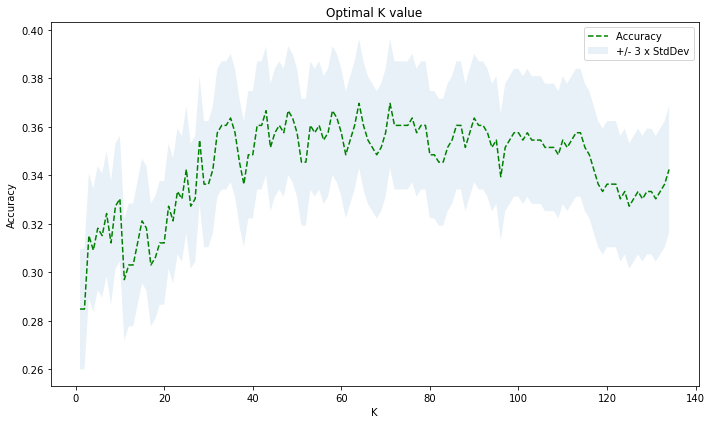

In [19]:
### calculating model accuracy

Ks = 135
mean_accuracy = np.zeros(Ks-1)
stdDev_accuracy = np.zeros(Ks-1)

for each_Ki in range(1,Ks):
    _knn_model_ = KNeighborsClassifier(n_neighbors= each_Ki).fit(X_train, y_train)
    y_hat = _knn_model_.predict(X_test)
    
    # Accuracy
    mean_accuracy[each_Ki-1] = metrics.accuracy_score(y_test,y_hat)
    
    # not imp - optional
    stdDev_accuracy[each_Ki-1] = np.std(y_hat==y_test) / np.sqrt(y_hat.shape[0])
    
## plotting the Accuracy vs K 
print('\n\n---------------------- Plot: Accuracy vs K  --------------------------') 
plt.figure(figsize=(10,6))
plt.plot( range(1,Ks), mean_accuracy,
          color = 'green', linestyle = 'dashed')

fill_Area1 = mean_accuracy - stdDev_accuracy
fill_Area2 = mean_accuracy + stdDev_accuracy

plt.fill_between( range(1,Ks),
                fill_Area1, fill_Area2,
                alpha = 0.1)

plt.title("Optimal K value"); plt.xlabel('K'); plt.ylabel('Accuracy')
plt.legend(('Accuracy ' , '+/- 3 x StdDev'))

plt.tight_layout()
plt.show()

In [20]:
# Model Evualuation with optimum k

Kn = 6

knn_model = KNeighborsClassifier(n_neighbors = Kn).fit(X_train,y_train)

y_hat = knn_model.predict(X_test)
print('\n\n---------------------- Accuracy for Kn =  6  --------------------------') 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

print('\nClassification Report:\n ', classification_report(y_test, y_hat) )
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_hat) )

Kn = 44

knn_model = KNeighborsClassifier(n_neighbors = Kn).fit(X_train,y_train)

y_hat = knn_model.predict(X_test)
print('\n\n---------------------- Accuracy for Kn =  44  --------------------------') 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

print('\nClassification Report:\n ', classification_report(y_test, y_hat) )
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_hat) )

Kn = 63

knn_model = KNeighborsClassifier(n_neighbors = Kn).fit(X_train,y_train)

y_hat = knn_model.predict(X_test)
print('\n\n---------------------- Accuracy for Kn =  63  --------------------------') 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

print('\nClassification Report:\n ', classification_report(y_test, y_hat) )
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_hat) )




---------------------- Accuracy for Kn =  6  --------------------------
Train set Accuracy:  0.5313432835820896
Test set Accuracy:  0.3151515151515151

Classification Report:
                precision    recall  f1-score   support

           1       0.34      0.47      0.39        88
           2       0.28      0.33      0.30        64
           3       0.32      0.27      0.29        95
           4       0.30      0.19      0.24        83

    accuracy                           0.32       330
   macro avg       0.31      0.32      0.31       330
weighted avg       0.31      0.32      0.31       330


 Confusion Matrix:
 [[41 10 24 13]
 [17 21 13 13]
 [39 19 26 11]
 [24 24 19 16]]


---------------------- Accuracy for Kn =  44  --------------------------
Train set Accuracy:  0.4417910447761194
Test set Accuracy:  0.3515151515151515

Classification Report:
                precision    recall  f1-score   support

           1       0.37      0.52      0.44        88
           2   